In [2]:
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tck
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import PIL.Image
mpl.rcParams['axes.titlesize']=13
style = {'axes.facecolor': 'whitesmoke','axes.grid':True}
bpp = {'L': ['Escala de grises', 8], 'RGB': ['Truecolor', 24], 'RGBA': ['Deepcolor', 32]}

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery("div.input").toggle();">Ver código</button>''', raw=True)
CSS = """#notebook div.output_subarea {     max-width:100%;""" HTML('<style>{}</style>'.format(CSS)).

Ver código

***
<h1 style="color:black;font-size:40px"><center>MÓDULO 3</center></h1>

***
***

# 3.2 Actividad 6

***
>***a) Aplicar una transformación de intensidad a la imagen cerebro.tif. para aprovechar todo el rango dinámico de la imagen. Mostrar la imagen y su histograma antes y después de la transformación.***
***

***Abro la imagen y miro qué tipo de dato es...*** 

In [3]:
# Creo una función para abrir la imagen y la prof de bits..
def abrir(file):
    img = mpl.image.imread(file)
    print('Tipo de dato:', img.dtype)
    bd = int(img.nbytes*8/img.size)
    return img, bd

img, bd = abrir('Data/cerebro.tif')

Tipo de dato: uint16


***La miro junto con su histograma, para ver cómo está distribuida la intensidad...***

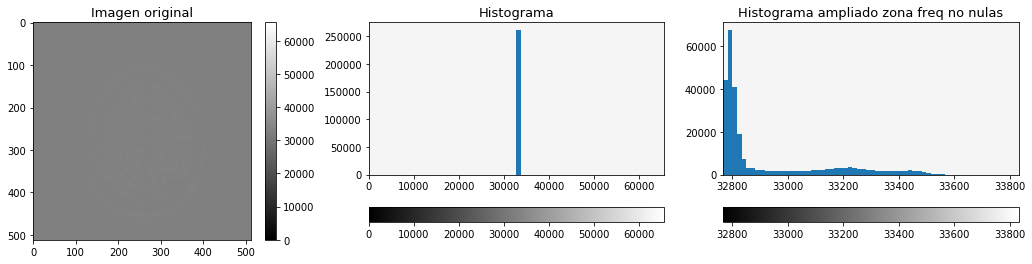

In [4]:
# Grafico...
fig, ax = plt.subplots(1, 3, figsize=(18,4))

cb = ax[0].imshow(img, cmap='gray', vmin=0, vmax=2**16-1); # forzando colormap a extenderse en 16bits
fig.colorbar(cb, ax=ax[0]);
ax[0].set(title='Imagen original')

ax[1].hist(img.ravel(), bins=64, range=(0,2**bd-1));
ax[1].set(xlim=(0,2**bd-1), facecolor='whitesmoke', title='Histograma');
fig.colorbar(cb, ax=ax[1], orientation='horizontal');

mapp = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=img.min(), vmax=img.max()), cmap='gray')
ax[2].hist(img.ravel(), bins=64, range=(img.min(),img.max()));
ax[2].set(xlim=(img.min(),img.max()), facecolor='whitesmoke',
          title='Histograma ampliado zona freq no nulas');
fig.colorbar(mapp, ax=ax[2], orientation='horizontal');

***Noto que en principio no puedo distinguir nada, y que la intensidad está concentrada en la zona de 30k-40k. De hecho los valores máximos y mínimos de la imagen están en un rango estrecho de unos ~1000 valores...***

In [5]:
print('Valor mínimo: {}\nValor máximo: {} \nRango: {}'
      .format(img.min(), img.max(), img.max()-img.min()))

Valor mínimo: 32768
Valor máximo: 33832 
Rango: 1064


***Puedo incrementar el contraste con un stretching, aprovechando mejor los 16bits...***  

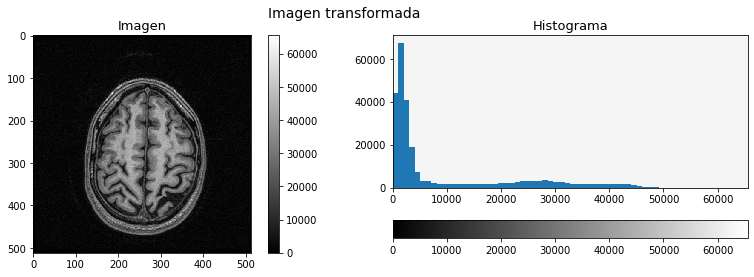

In [6]:
### Armo una función se stretching... 
def contraste(img, umb_min=None, umb_max=None, dtype=None, bd=None): 
    if umb_min is None: umb_min = img.min() 
    if umb_max is None: umb_max = img.max() 
    if dtype is None: dtype = img.dtype 
    if bd is None: bd = img.nbytes*8/img.size 
    img = np.where(img<umb_min, umb_min, img) 
    img = np.where(img>umb_max, umb_max, img) 
    return (((img - umb_min)/(umb_max - umb_min))*(2**bd-1)).astype(dtype)

img_c = contraste(img)

# Armo una función para mostrar imagen e histograma..
def visualizar(img, bd, tit='original', yscale='linear', figsize=(14,4), nrowscols=(1,2), bins=64):
    fig, ax = plt.subplots(*nrowscols, figsize=figsize)
    fig.suptitle('Imagen '+tit, fontsize=14)
    cb = ax[0].imshow(img, cmap='gray', vmin=0, vmax=2**bd-1); 
    fig.colorbar(cb, ax=ax[0]);
    ax[0].set(title='Imagen')
    ax[1].hist(img.ravel(), bins=bins, range=(0,2**bd-1));
    ax[1].set(xlim=(0, 2**bd-1), yscale=yscale, facecolor='whitesmoke', title='Histograma');
    fig.colorbar(cb, ax=ax[1], orientation='horizontal');
    return fig

# Grafico..
visualizar(img_c, bd, 'transformada');

***Veo que al hacer el stretching el histograma se expande y ocupa mejor el rango dinámico. Aún así se ve que hay una parte del rango poco utilizada (hay pocos píxeles con valores $>33500$ en la imagen original)...***

In [7]:
umb = 33500
n = (img>umb).sum()
print('Píxeles con valor mayor a {} en la imagen original: {} ({:.3f}%)'
      .format(umb, n, 100*n/(img.size)))

Píxeles con valor mayor a 33500 en la imagen original: 1016 (0.388%)


***Por lo que podría incrementar aún más el contraste si aceptase perder la información de esos valores...***

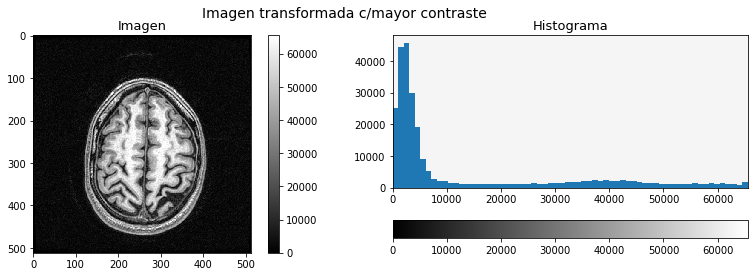

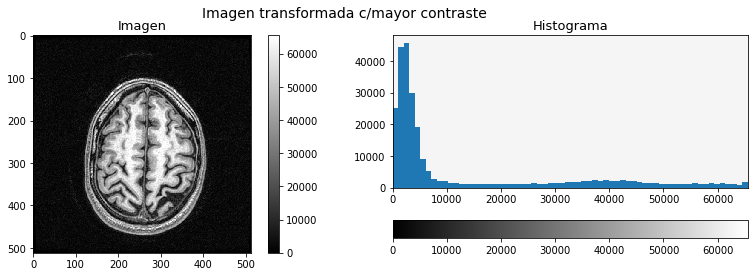

In [8]:
# Usando la función de stretching creada previamente...
img_c2 = contraste(img, umb_min=None, umb_max=umb)

# Grafico usando la función creada previamente..
visualizar(img_c2, bd, 'transformada c/mayor contraste')

***
**NOTA DE PYTHON: en la primera celda tuve que forzar con los argumentos que el colormap se extienda los 16bits; ello porque por defecto el comando `imshow()` de `matplotplib` ajusta el colormap a los valores que efectivamente tiene la matriz (ie lo que entiendo que en MATLAB hace el agregado de `[]` como segundo parámetro de `imshow(img,[])`). De hecho, puede verse que mostrando la imagen original con los argumentos por defecto, se obtiene la misma visualización que con la transformación recién hecha. Lógicamente, el cambio no es numérico, como puede verse en el historgrama original...**

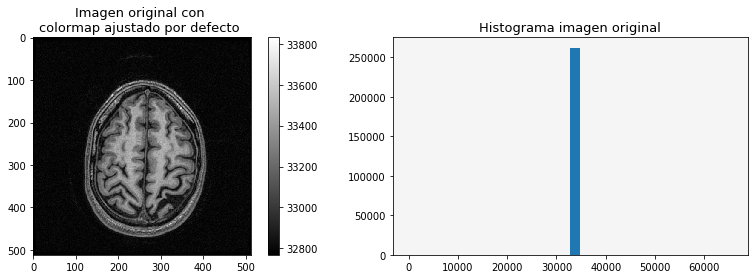

In [9]:
# Grafico...
fig, ax = plt.subplots(1, 2, figsize=(14,4))
cb = ax[0].imshow(img, cmap='gray'); # colormap por defecto ajustado al rango de valores de la imagen
fig.colorbar(cb, ax=ax[0]);
ax[0].set(title='Imagen original con \ncolormap ajustado por defecto ')
ax[1].hist(img.ravel(), bins=32, range=(0,2**16-1));
ax[1].set(facecolor='whitesmoke', title='Histograma imagen original');

***
***
>***b) Aplicar una transformación de intensidad a la imagen Torax.bmp para mejorar la visualización de las estructuras óseas. Mostrar la imagen y su histograma antes y después de la transformación.***
***

***Abro la imagen y miro qué tipo de dato es...*** 

In [10]:
# Uso función creada al principio..
img, bd = abrir('Data/Torax.bmp');

Tipo de dato: uint8


***La miro junto con su histograma, para ver cómo está distribuida la intensidad...***

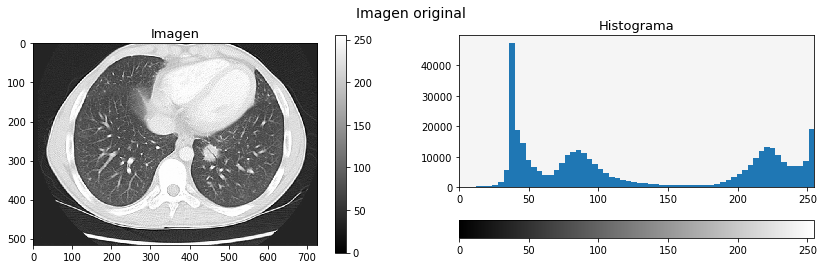

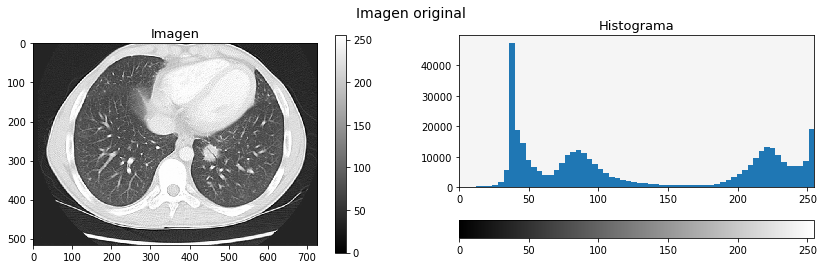

In [11]:
visualizar(img, bd)

***Veo que la distribución tiene 4 intervalos de intensidad de mayor frecuencia que, de izquierda a derecha podrían estar asociadas (mayormente) con: la periferia de la imagen; estructura pulmonar; corazón, vasos y otro tejido blando; y tejido óseo, respectivamente.<br>
<br>
Es posible inferir que las dos últimas son difíciles de separar entre sí. Sin embargo, parece más clara la separación de ellas con los pulmones (cargados de aire) y la periferia de la imagen. En ese sentido, pruebo quedándome con los valores mayores a 170 (y luego con los mayores a 210), y los expando en todo el rango, obviamente a expensas de acumular en 0 los píxeles por debajo de ese valor...***

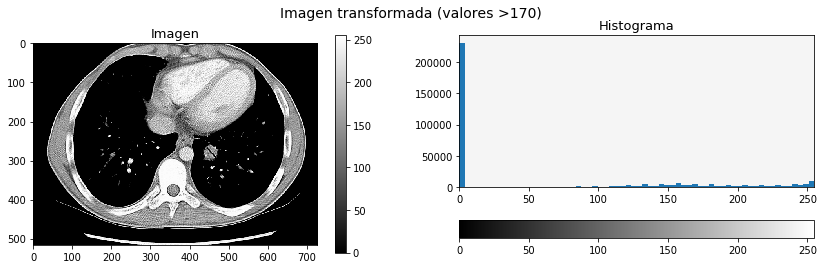

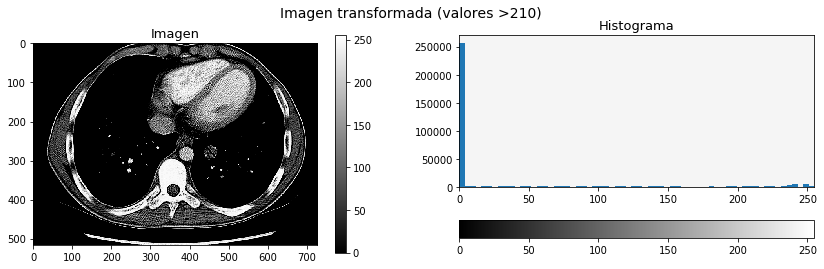

In [12]:
for u_min in [170,210]:
    img_c = contraste(img, umb_min=u_min)                             # Expando 
    visualizar(img_c, bd, 'transformada (valores >{})'.format(u_min)) # Grafico

***Puede verse cómo en ambas situaciones hay acumulación en el 0 (lógicamente algo mayor en la segunda). La primera imagen mejora el contraste en estructuras óseas respecto a la original. La segunda lo incrementa aún más, separándo claramente de cartílago y el tejido subcutáneo que rodea al tórax (y confirmando que esas zonas deben corresponder mayormente en la tercer "moda" del histograma original), pero ya se pierde mucho detalle del tejido óseo de interés.***

***Alternativamente a lo hecho previamente, quizá podría pensarse en una transformación de tipo gamma, con $ \gamma >1$, que comprime (disminuye contraste) para las intensidades bajas y expande (incrementa contraste) para las altas.***

***
***
>***c) Abrir una imagen y generar la imagen complemento. Comparar sus histogramas***
***

***Uso la imagen `mamo.bmp` del Módulo 2, y voy a usar la liberería PIL para probar otra forma. La abro y miro qué tipo de dato es...***

In [13]:
img = PIL.Image.open('Data/mamo.bmp')
bd = bpp[img.mode][1]
print('Tipo de color: {}\nProfundidad de bits: {}'.format(*bpp[img.mode]))

Tipo de color: Escala de grises
Profundidad de bits: 8


***Calculo el complemento y miro ambas con sus respectivos histogramas...***

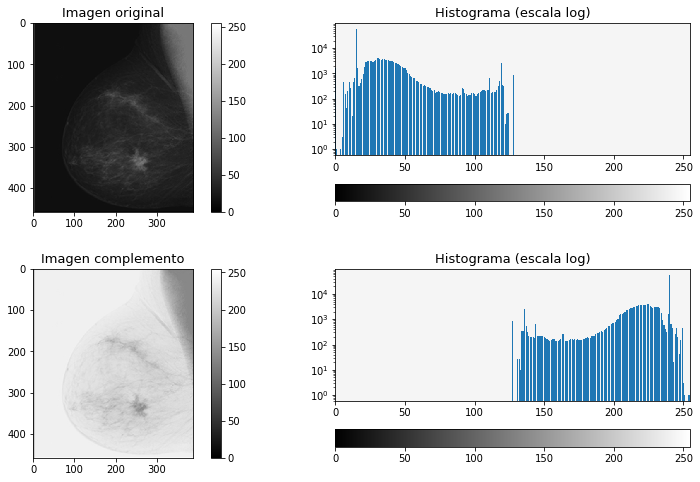

In [14]:
# Calculo el complemento...
img_comp = PIL.Image.eval(img, lambda x: (2**bd-1) - x)

# Grafico...
fig, ax = plt.subplots(2, 2, figsize=(14,8), gridspec_kw={'hspace':0.3})
for axx, im, t in zip([ax[0,:], ax[1,:]], [img, img_comp], ['original', 'complemento']):
    cb = axx[0].imshow(im, cmap='gray', vmin=0, vmax=2**bd-1)
    fig.colorbar(cb, ax=axx[0]);
    axx[0].set(title='Imagen ' + t)
    axx[1].bar(range(2**bd), im.histogram());
    axx[1].set(xlim=(0,2**bd - 1), yscale='log', facecolor='whitesmoke',
               title='Histograma (escala log)');
    fig.colorbar(cb, ax=axx[1], orientation='horizontal');

***Puede verse que las imágenes son inversas, y los histogramas resultan imágenes especulares respecto de la intensidad media del rango, lo cual puede verificarse numéricamente...***

In [15]:
h1 = img.histogram()
h2 = img_comp.histogram()
print('Los histogramas son versiones invertidas:', np.array_equal(h1,np.flip(h2)))

Los histogramas son versiones invertidas: True


***Haciendo lo mismo con matplotlib...***

Tipo de dato: uint8
Los histogramas son imágenes especulares: True


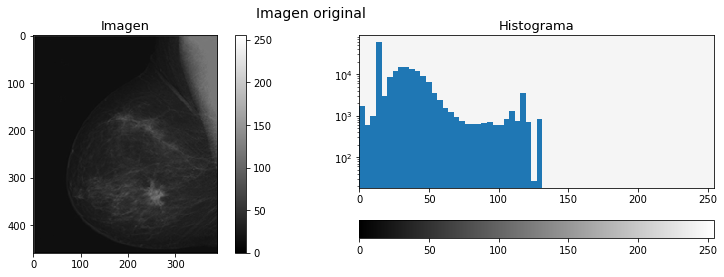

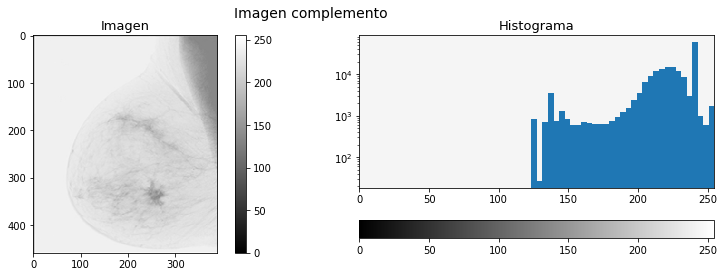

In [16]:
# Abro..
img, bd = abrir('Data/mamo.bmp')

# Transformo..
img_comp =  (2**bd-1) - img

# Grafico..
for im, t in zip([img, img_comp], ['original', 'complemento']):
    visualizar(im, bd, t, yscale='log')

# Verifico numéricamente..
h1, b = np.histogram(img, range=(0,2**bd), bins=2**bd)
h2, b2 = np.histogram(img_comp, range=(0,2**bd), bins=2**bd)
print('Los histogramas son imágenes especulares:', np.allclose(h1, np.flip(h2)))

***
***

# 3.3 Actividad 7

***
>***Supongamos que adquirí con el sistema de imágenes CANON(GOS) la siguiente imagen.<br>
¿Cuál es el contraste que hay entre los objetos y el fondo?***
***

***Abro la imagen y miro qué tipo de dato es...***<br>
(**NOTA**: Matplotlib por defecto normaliza los \*.png a \[0,1\] y PIL lo reconoce como si fuera `int32`, por lo que uso una función especial del primer módulo para anular esa conducta.)

In [17]:
import matplotlib._png as png

img = png.read_png_int('Data/Imagen_Canon_GOS.png')
print('Tipo de dato:', img.dtype)
bd = np.uint8(img.nbytes*8/img.size)

Tipo de dato: uint16


***La miro junto con su histograma, para ver cómo está distribuida la intensidad...***

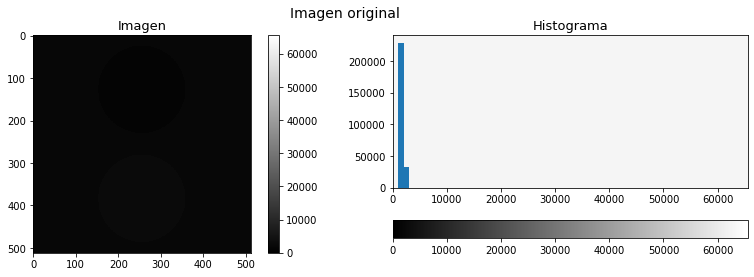

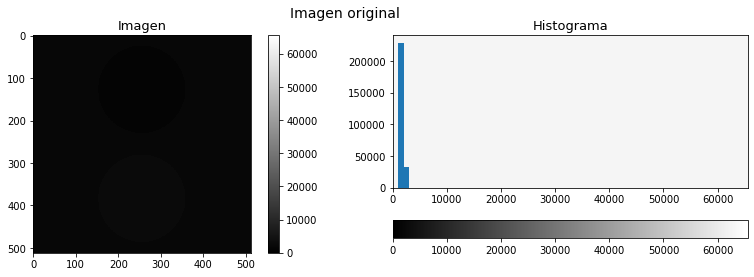

In [18]:
visualizar(img,bd)

***Veo que las intensidades están todas agrupadas en la parte inferior del rango.<br><br>
De acuerdo a la diapositiva, el sistema de detección CANON GOS tiene una respuesta de valor de píxel (PV) en función del kerma en aire (K) que se puede ajustar con la función:*** 
$$
PV = 1407.1 \ln(K)-1199.3
$$
***Para linealizarlo, puede pensarse en una transformación inversa que compense la respuesta original del equipo:***
$$
\tilde{PV} = e^{\frac{PV}{1407.1}} = C.K
$$

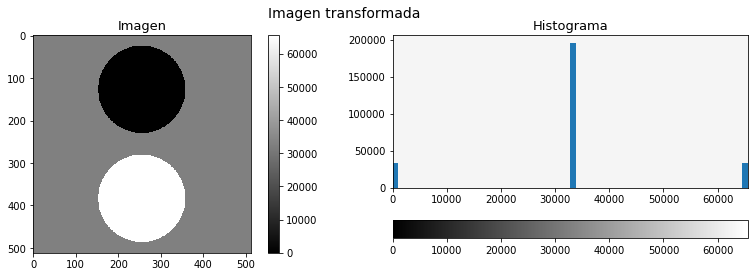

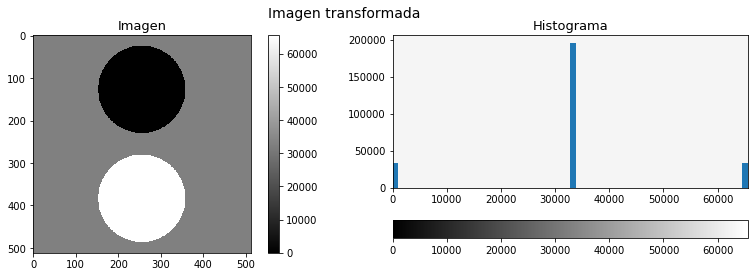

In [19]:
# Linealizo..
img_l_ = np.exp(img/1407.1)

# Aplico función creada previamente para expandir a todo el rango..
img_l = contraste(img_l_, bd=bd, dtype=img.dtype)

# Grafico..
visualizar(img_l, bd, 'transformada')

***Veo que con esa transformación puedo distinguir mejor las estucturas.***<br>

***Nótese que en este caso, como hay solo tres intensidades presentes y las relevantes son la mayor y la menor, podía haberlo evindenciado con una transformación de stretching simple como en la Actividad 6.***

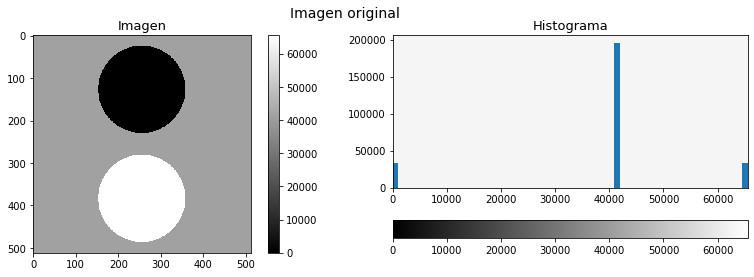

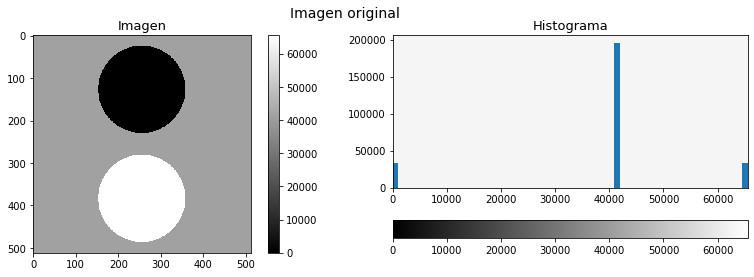

In [20]:
# Aplico directamente función creada previamente para expandir a todo el rango..
img_c = contraste(img, bd=bd)

# Grafico..
visualizar(img_c, bd)

***Sin embargo, el valor intermedio no mantiene la misma posición, porque sigue la respusta logarítmica. De hecho, obsérvese lo siguiente...*** 

In [21]:
I = np.unique(img_l)
print('Instensidades con respuesta linearizada: {} \n(en tanto por uno {})\n'.format(I, (I/I.max()).round(2)))
I = np.unique(img_c)
print('Instensidades con expansión sin linearizar: {} \n(en tanto por uno {})\n'.format(I, (I/I.max()).round(2)))

Instensidades con respuesta linearizada: [    0 32793 65535] 
(en tanto por uno [0.  0.5 1. ])

Instensidades con expansión sin linearizar: [    0 41372 65535] 
(en tanto por uno [0.   0.63 1.  ])



***Bajo la respuesta lineal el gris de la periferia corresponde exactamente a la intensidad media de las intensidades de los círculos. En cambio, con la respuesta logarítmica original, que siempre expande a bajas intensidades (y más cuanto más baja sea la intensidad), ese mismo gris queda con una intensidad más cercana a la del círculo blanco.***

***
***

# 3.5 Actividad 8

***
>***a)Aplicar la ecualización del histograma a una imagen. Mostrar la imagen, el histograma y el histograma acumulado antes y después de la transformación.<br>
b)Hay algún cambio en la imagen si vuelvo a ecualizar?<br>
c)En la siguiente figura se muestran cuatro transformaciones de ecualización. ¿En cuál de los cuatro casos crees que se va a apreciar más en la imagen el efecto de la ecualización?***
***

***a) Abro la imagen y miro de qué formato es...***

In [22]:
img, bd = abrir('Data/Torax.bmp')

Tipo de dato: uint8


***La miro junto con su histograma, para ver cómo está distribuida la intensidad, agregando ahora también el histograma normalizado acumulado...***

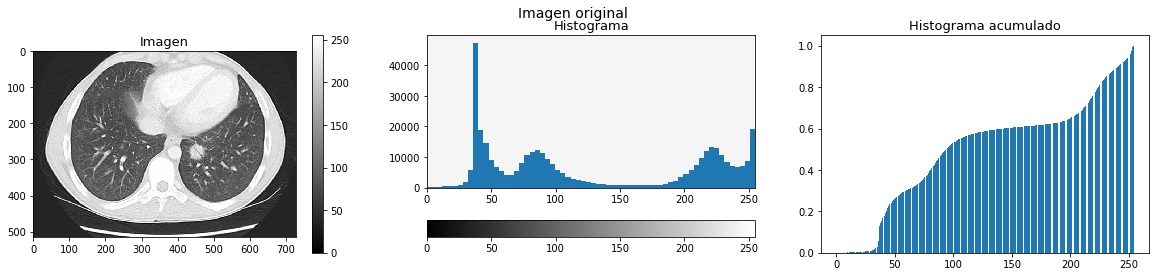

In [23]:
# Histograma acumulado..
hist, bins = np.histogram(img, bins=2**bd)
hist =  (hist/img.size).cumsum()

# # Alternativa..
# import scipy.stats as st
# ht = st.cumfreq(img, numbins=2**bd)[0]/img.size   # defaultreallimits=(0,256)

# Grafico
fig = visualizar(img, bd, 'original', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins[:-1], hist)
ax.set_title('Histograma acumulado');

***Ecualizo y muestro la imagen ecualizada con su histograma, y el acumulado...***

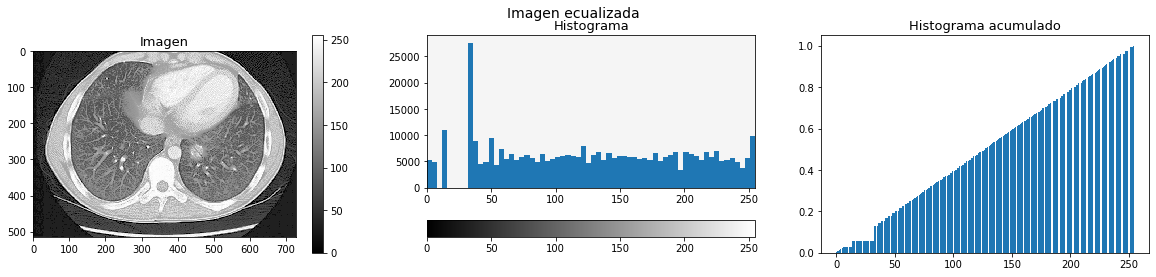

In [24]:
# Ecualizo armando una función...
def ecualizar(img, hacum, bd=None, imgdoub=False):
    if bd is None: bd = int(img.nbytes*8/img.size)
    if imgdoub:
        img_e = (L - 1) * hacum[(img.ravel()*L).astype(np.int)]
    else:
        img_e = (2**bd - 1) * hacum[img.ravel()]
    return img_e.reshape(img.shape).astype(img.dtype)

img_ec = ecualizar(img, hist)

# Histograma acumulado..
hist_ec = np.histogram(img_ec, bins=2**bd)[0]
hist_ec = (hist_ec/img_ec.size).cumsum()   # normalizo y guardo el acumulado

# Grafico
fig = visualizar(img_ec, bd, 'ecualizada', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins[:-1], hist_ec)
ax.set_title('Histograma acumulado');

***
***b) Volver a equalizar no debería producir ningún cambio ya que una vez hecha la transformación "no queda nada por ecualizar". En ese sentido es análogo a lo que sucede con la normalización. Una vez realizada, repetirla no produce cambios. Puede verse de forma más sencilla pensando en una situación con variables continuas. En ese caso el histograma acumulado resultante sería la función identidad, lo cual implicaría una transformación trivial. Nótese que, si la imagen ya está ecualizada su intensidad tiene una distribución uniforme, cuya función de densidad es $p(x)= 1/(L-1)$ con lo cual:***

$$
T(x) = (L-1) \int_{0}^x \frac{1}{L-1}dx = x
$$

***Donde se observa que la salida de la transformación es idéntica a la entrada. Ello puede verificarse (gráfica y) numéricamente...*** 

Los histogramas son idénticos: True


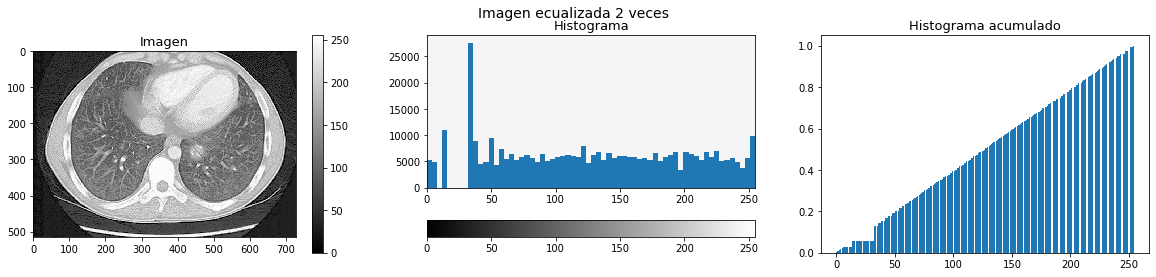

In [25]:
img_ec2 = ecualizar(img_ec, hist_ec)

# Histograma acumulado..
hist_ec2 = np.histogram(img_ec2, bins=2**bd)[0]
hist_ec2 = (hist_ec2/img_ec2.size).cumsum()   # normalizo y guardo el acumulado

# Grafico
fig = visualizar(img_ec2, bd, 'ecualizada 2 veces', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins[:-1], hist_ec2)
ax.set_title('Histograma acumulado')

print('Los histogramas son idénticos: {}'.format(np.allclose(hist_ec, hist_ec2)))

***
***Haciendo a) y b) con la librería PIL...***

Tipo de color: Escala de grises
Profundidad de bits: 8


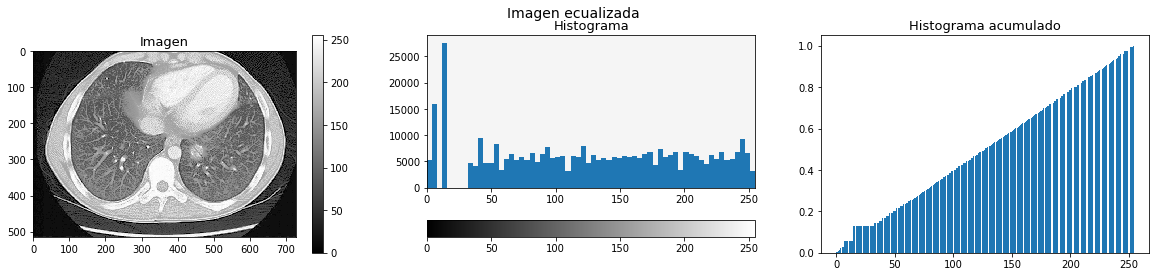

In [26]:
from PIL import ImageOps

img_ = PIL.Image.open('Data/Torax.bmp')
bd = bpp[img_.mode][1]
print('Tipo de color: {}\nProfundidad de bits: {}'
      .format(*bpp[img_.mode]))

img_ec_ = ImageOps.equalize(img_)                      # función de ecualización de la libería

# Histograma acumulado..
hist_ec_ = np.array(img_ec_.histogram())
hist_ec_ = (hist_ec_/np.prod(img_ec_.size)).cumsum()   

# Grafico
fig = visualizar(np.array(img_ec_), bd, 'ecualizada', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins[:-1], hist_ec_)
ax.set_title('Histograma acumulado');

Los histogramas son idénticos: True


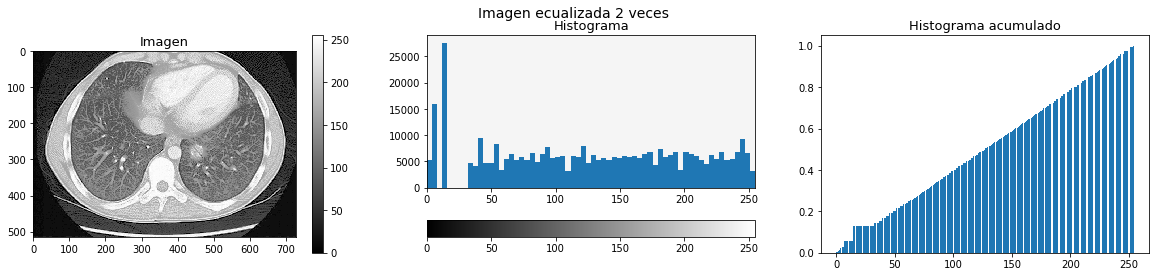

In [27]:
# Segunda ecualización..
img_ec2_ = ImageOps.equalize(img_ec_)  

# Histograma acumulado..
hist_ec2_ = np.array(img_ec2_.histogram())
hist_ec2_ = (hist_ec2_/np.prod(img_ec2_.size)).cumsum()   # normalizo y guardo el acumulado  

# Grafico
fig = visualizar(np.array(img_ec2_), bd, 'ecualizada 2 veces', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins[:-1], hist_ec2_)
ax.set_title('Histograma acumulado')

print('Los histogramas son idénticos: {}'.format(np.allclose(hist_ec_, hist_ec2_)))

****

***c) Mirando las tranformaciones de ecualización que se muestran en el gráfico a continuación, el efecto de la trasformación debe ser mayor en la (1) dado que es la que tiene más comprimidas las intensidades en un intervalo pequeño (indicado por la pendiente de la distribución acumulada). En contraste, se observa que la imagen (4) originalmente cubre de forma aproximadamente uniforme todo el rando dinámico (su acumulada es similar a la identidad), por lo que esa debe ser la imagen en la que la ecualización tiene menor efecto.***  

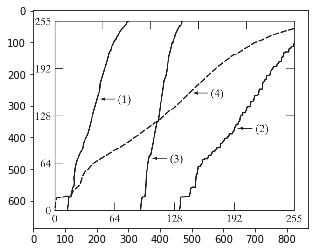

In [28]:
plt.imshow(mpl.image.imread('Data/eq.png'));

***
***

# 3.5 Actividad 9

***
>***Abrir dos imágenes y trabajá con una de las operaciones aritméticas: suma , RESTA (yo), multiplicación, división. No hace falta que todos prueben con todas las operaciones. Sugiero que se las repartan. El objetivo es que vean cómo cambia la salida de la operación según algunos aspectos de la implementación. Entonces, se pide comparar la salida obtenida entre diferentes variantes en el modo de implementación de la operación. Las variantes analizadas debe incluir:***<br>
> - ***tipo de dato: Probá de hacer las operaciones usando***:
>   - a) el tipo de dato original de las imágenes y
>   - b) convirtiendo a double antes de realizar las operaciones.<br>
> - ***sintaxis para indicar la operación: Probá usando***
>   - a) un operador corriente (+,-,.\*,./) y
>   - b) una función propia del software que uses.
***

***Abro dos imágenes de las usadas previamente, miro qué tipo son y sus tamaños, y las grafico...***

Tipo de dato: uint8
Tipo de dato: uint8
(516, 727)
(459, 389)


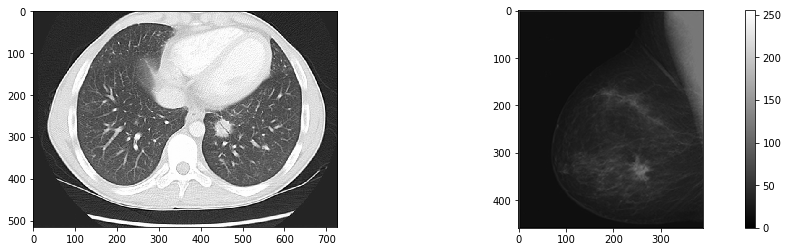

In [29]:
img1, bd = abrir('Data/torax.bmp')
img2, _ = abrir('Data/mamo.bmp')
print(img1.shape)
print(img2.shape)
fig, ax = plt.subplots(1, 2, figsize=(15,4))
cb = ax[0].imshow(img1, cmap='gray', vmin=0, vmax=2**bd-1); 
ax[1].imshow(img2, cmap='gray', vmin=0, vmax=2**bd-1); 
fig.colorbar(cb, ax=ax);

***Viendo que la del Tórax es más grande podría probar quedándome con los píxeles centrales correspondientes al tamaño de la otra imagen.***

Mismo tamaño: True


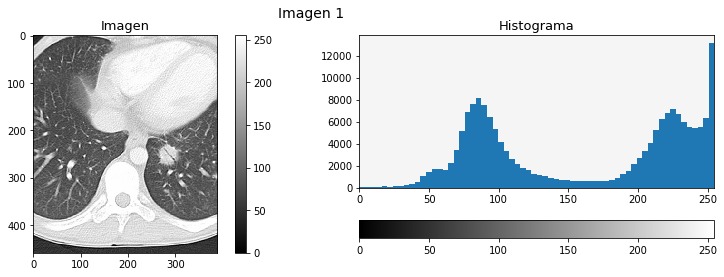

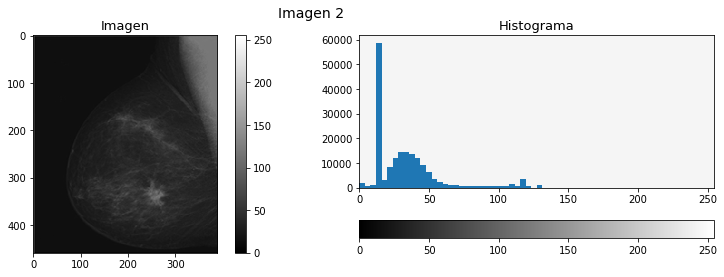

In [30]:
# Me quedo con la parte central de la img1..
offh, offv = ((np.array(img1.shape) - np.array(img2.shape))/2).astype(np.int)
img1_r = img1[offh+1:-offh, offv:-offv]

print('Mismo tamaño:', img1_r.shape == img2.shape)

for im, n in zip([img1_r, img2], [1, 2]):
    visualizar(im, bd, str(n))

***Ahora procedo a hacer la resta. Primero la hago con los tipos de dato que tienen las imágenes originales...***

Hay valores de píxeles con mayor intensidad en imagen 2: True
Tipo de dato del resultado: uint8
Hay valores negativos: False


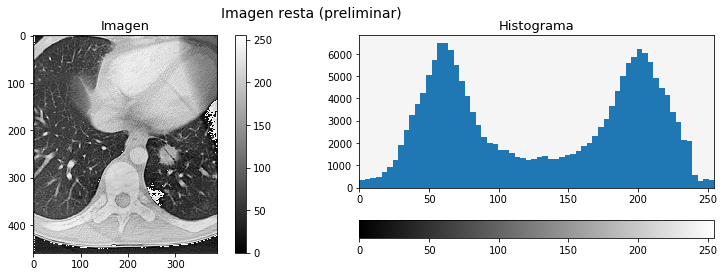

In [31]:
img_dif = img1_r - img2
print('Hay valores de píxeles con mayor intensidad en imagen 2:', np.any(img2 < img1_r))
print('Tipo de dato del resultado:', img_dif.dtype)
print('Hay valores negativos:', np.any(img_dif<0))

visualizar(img_dif, bd, 'resta (preliminar)');

***Pero veo que, como mantiene el tipo de dato, estoy perdiendo los negativos. En particular, lo que hace por defecto es "pegar la vuelta", de modo que $0-1=255$, como se ve a continuación...***

In [32]:
np.array([1,1,1], dtype=np.uint8) - np.array([1,2,3], dtype=np.uint8)

array([  0, 255, 254], dtype=uint8)

***Una primera alternativa es llevar a 0 todos los valores que serían negativos (notese la acumulación en el primer bin del histograma)...***

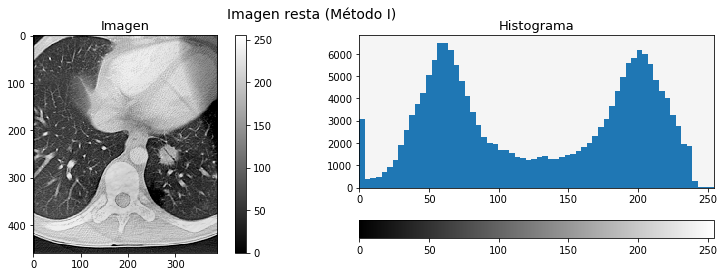

In [33]:
# Enmascaro con los píxeles conflictivos y asigno 0 ..
img_dif[img1_r < img2] = 0

# Grafico
visualizar(img_dif, bd, 'resta (Método I)');

***Una segunda posibilidad sería pasar primero a float64 (double) para poder trabajar con valores negativos, luego sumar el máximo de intensidad para asegurarme que no tengo valores negativos, y finalmente dividir por 2 (para mantener la profundidad de bits inicial) y reconvertir al tipo de dato original....***

Tipo de dato del resultado intermedio: float64
Hay valores negativos en el resultado intermedio: True
Tipo de dato del resultado definitivo: uint8


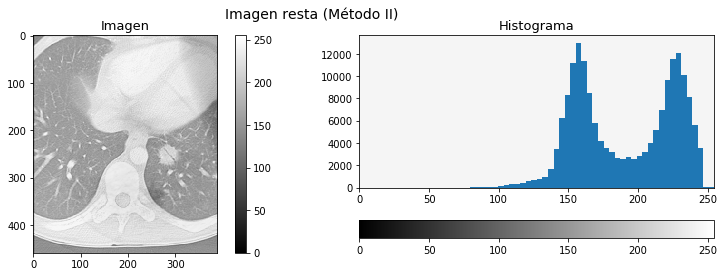

In [34]:
img_dif_2 = img1_r.astype(np.float64) - img2.astype(np.float64)
print('Tipo de dato del resultado intermedio:', img_dif_2.dtype)
print('Hay valores negativos en el resultado intermedio:', np.any(img_dif_2<0))

img_dif_2 += 255
img_dif_2 /= 2
img_dif_2 = img_dif_2.astype(np.uint8)
print('Tipo de dato del resultado definitivo:', img_dif_2.dtype)

# Grafico
visualizar(img_dif_2, bd, 'resta (Método II)');

***Aunque se observa que algo no ideal de ese método es que no aprovecha todo el rango dinámico.<br><br>
En ese sentido, la tercera alternativa propuesta es similar a la anterior, pero en lugar de sumar el máximo de intensidad y dividir por 2 para obtener valores dentro del rango, hago ese paso con una transformación lineal, que no solo lleva los valores al rango, sino que además me permite hacer una expansión (respecto al método previo), de modo de optimizar ese rango y obtener el máximo contraste.***

Tipo de dato del resultado intermedio: float64
Hay valores negativos en el resultado intermedio: True
Tipo de dato del resultado definitivo: uint8


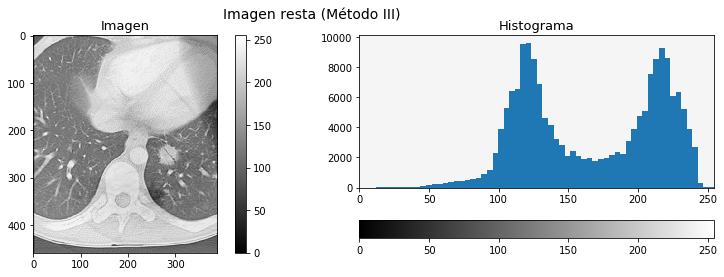

In [35]:
img_dif_3 = img1_r.astype(np.float64) - img2.astype(np.float64)
print('Tipo de dato del resultado intermedio:', img_dif_3.dtype)
print('Hay valores negativos en el resultado intermedio:', np.any(img_dif_3<0))

img_dif_3 = contraste(img_dif_3, dtype=img2.dtype, bd=bd)
print('Tipo de dato del resultado definitivo:', img_dif_3.dtype)

# Grafico
visualizar(img_dif_3, bd, 'resta (Método III)');

***
***Con respecto a los operadores usados, en una resta no hay mayores inconvenientes porque la operación matricial también es punto a punto, por lo que se puede usar directamente `A-B`. De todos modos, aún en el caso del producto (y potencia), donde se presenta el mayor conflicto, por defecto en la sintaxis `A*B` la librería `numpy` efectúa la operación punto a punto; `@` es el operador reservado para el producto matricial, con sintaxis `A @ B`, que es análoga a `np.dot(A,B)`.***

***
***

# Ejercicio extra

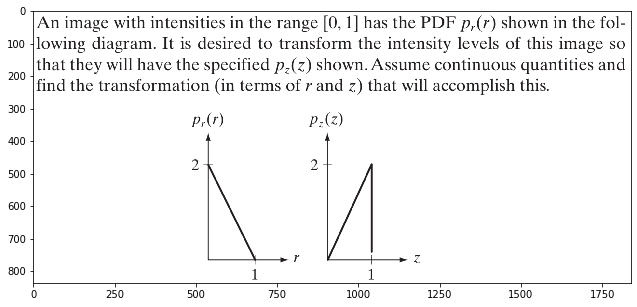

In [36]:
fig, ax = plt.subplots(figsize=(16,5))
ax.imshow(mpl.image.imread('Data/h2.png'));

***La primera imagen tiene la función de densidad de probabilidad:***
$$
p(x) = 2 - 2x
$$

***Por lo que su transformación a la imagen ecualizada está dada por:***
$$
s = T_1(r) = (L-1)\int_0^x (2x-x^2)dx \Longleftrightarrow s = (L-1)(2x-x^2)
$$

***Por otro lado la imagen a la que quiero llegar tiene la función de densidad de probabilidad:***
$$
p(z) = 2z
$$

***Por lo que su transformación a la imagen ecualizada está dada por:***
$$
s = T_2(z) = (L-1)\int_0^z 2z\:dz \Longleftrightarrow s = (L-1)\:z^2
$$

***Dado que siempre estamos hablando de la misma imagen, relacionando ambas transformaciones es posible obtener un mapeo de la imagen original $x$ a la imagen deseada $z$, teniéndose:***
$$
s = (L-1)(2x-x^2) = (L-1)\:z^2 \Longleftrightarrow z = \sqrt{2x-x^2}
$$

***Nótese que ello implica pensar en una transformación inversa $z=T_2^{-1}(s)$, que mapea la imagen ecualizada $s$ a la imagen $z$, y luego componer esa transformación con $T_1(x)$:***
$$
z = (T_2^{-1} \circ T_1) (x)= T_2^{-1}(T_1(x)) = \sqrt{2x-x^2}
$$

<br>

***De forma más directa (como sugirió Betina)...***
$$
p(z) = p (x) \left|  \frac{dr}{dz} \right| \Longleftrightarrow   2zdz = (2 - 2x)dx \\
\int_0^z 2zdz = \int_0^x (2 - 2x)dx \Longleftrightarrow z^2 = 2x-x^2  \Longleftrightarrow z = \sqrt{2x-x^2}
$$
<br>

***Haciendo un ejemplo numérico...***

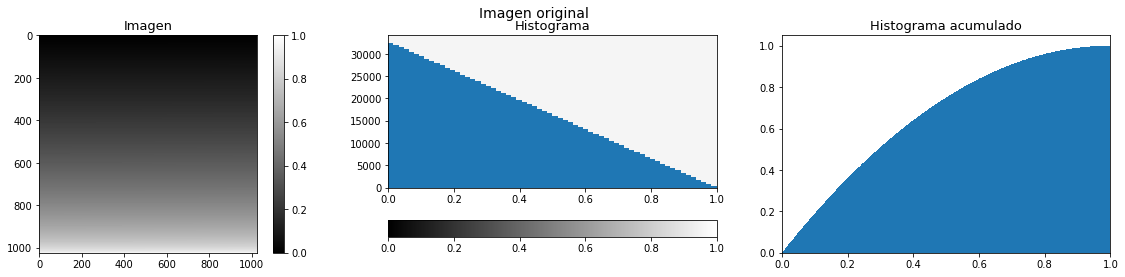

In [37]:
bd = 10
L = 2**bd 

# IMAGEN ORIGINAL
# Histograma de origen...
hx = np.linspace(0,1,2**bd, endpoint=False)
hy = 2 - 2*hx

# sintetizo los píxeles originales consistentes con ese hist
x = np.concatenate([np.repeat(j,int(k*L)) for j,k in zip(hx,hy)])

# Calculo el histograma acum
hist1, bins1 = np.histogram(x, bins=L, range=(0,1))
hist1_ac = (hist1/np.prod(x.shape)).cumsum()

# Visualizo con su histograma, para verificar...
fig = visualizar(x.reshape(L,L+1), 1, 'original', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins1[:-1], hist1_ac, width=0.001)
ax.set(title='Histograma acumulado', xlim=(0,1));

## Ecualizo para verificar..
#x_ec = ecualizar(x, hist1_ac, bd, imgdoub=True)
#visualizar(x_ec.reshape(L,L+1), bd, 'ecualizada', bins=32);

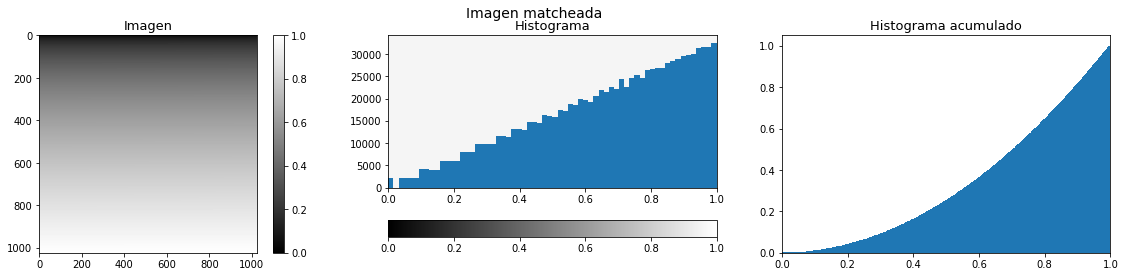

In [38]:
# Computo la transformación directa a la imagen con histograma deseado..
z = (2*x - x**2)**(1/2)

# Calculo el histograma acum de la nueva imagen...
hist2, _ = np.histogram(z, bins=L, range=(0,1))
hist2_ac = (hist2/np.prod(z.shape)).cumsum()

# Visualizo con su histograma...
fig = visualizar(z.reshape(L,L+1), 1, 'matcheada', nrowscols=(1,3), figsize=(20,4))
ax = plt.gca()
ax.bar(bins1[:-1], hist2_ac, width=0.01)
ax.set(title='Histograma acumulado', xlim=(0,1));

## Ecualizo para verificar..
#z_ec = ecualizar(z, hist2_ac, bd, imgdoub=True)
#visualizar(z_ec.reshape(L,L+1), bd, 'z ecualizada', bins=32);

***
***
<h1 style="color:green;font-size:50px;"><center>FIN!</center></h1>

***
***
***